Importation

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

Sélection des colonnes

In [ ]:
features = ["intervaldepth", "intervalmagnitude", "slip_type", "continent"]
target = ["tsunami"]

Chargement dataset

In [ ]:
data = pd.read_csv("../data/earthquakes_and_tsunami.csv", delimiter="|")
#supprimer les lignes où "tsunami" est vide
data = data.dropna(subset=target)

Paramètres de split

In [ ]:
validation_size = 0.2
train_size=0.8

Suppression des lignes uniques pour aider à la stratification

In [ ]:
group_sizes = data.groupby(target).transform('size')
data = data[group_sizes >= 4]

features/target

In [ ]:
data_features=data[features]
data_target=data[target]

Nombre de valeurs distinctes pour vérification

In [ ]:
for feature in features:
  print(f'{feature} : {len(data_features[feature].unique())}')

intervaldepth : 6
intervalmagnitude : 5
slip_type : 21
continent : 7


One-hot encoding

In [ ]:
data_features = pd.get_dummies(data_features, columns=features)

Split pour les dataset de validation, de test et de train

In [ ]:
validation_features, rest_features, validation_target, rest_target = train_test_split(data_features, data_target, stratify=data_target, test_size=1-validation_size, train_size=validation_size, random_state = 9)
train_features, test_features, train_target, test_target = train_test_split(rest_features, rest_target, stratify=rest_target, test_size=1-train_size, train_size=train_size, random_state = 9)

Modèle : Decision Tree

In [ ]:
param_grid = {
    'criterion' : ['gini', 'log_loss', 'entropy'],
    'splitter' : ['best', 'random'],
    'random_state' : [3, 9, 42],
    'class_weight' : ['balanced']
}

estimator = DecisionTreeClassifier()

Modèle : Random Forest

In [ ]:
param_grid = {
    'criterion' : ['gini', 'log_loss', 'entropy'],
    'random_state' : [3, 9, 42],
    'max_features' : ["sqrt", "log2"],
    'class_weight' : ['balanced']
}

estimator = RandomForestClassifier()

Modèle : Support Vector Machine

In [ ]:
model = LinearSVC(class_weight='balanced')

Modèle : Naive Bayes

In [ ]:
param_grid = {
    'alpha' : [0.1, 0.5, 1.0, 2.0]
    }
estimator = MultinomialNB()

Cross-validation (Stratifiée)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Fit le modèle

In [ ]:
model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=skf, scoring='recall', verbose = 2)
model.fit(train_features, train_target)

print("Best parameters : ", model.best_params_)

#pour tester le SVM : mettre toute la cellule en commentaire et décommenter ci-dessous
#model.fit(train_features, train_target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, r

In [ ]:
model.fit(train_features, train_target.values.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=best; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, random_state=3, splitter=random; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, r

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'log_loss', 'entropy'],
                         'random_state': [3, 9, 42],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

Tests/métriques

In [19]:
# prédictions
predictions = model.predict(test_features)
print(model)

#Evaluation sur divers critères des performances de l'algorithme
accuracy    = accuracy_score(test_target, predictions)
conf_matrix = confusion_matrix(test_target, predictions)
recall = recall_score(test_target, predictions, average='binary', pos_label=1)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Recall:", recall)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'log_loss', 'entropy'],
                         'random_state': [3, 9, 42],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)
Accuracy: 0.8084390370178618
Confusion Matrix:
 [[5915 1321]
 [ 159  331]]
Recall: 0.6755102040816326
Le pattern le plus fréquent est : [('tsunami', 1)]


Affichage du Decision Tree

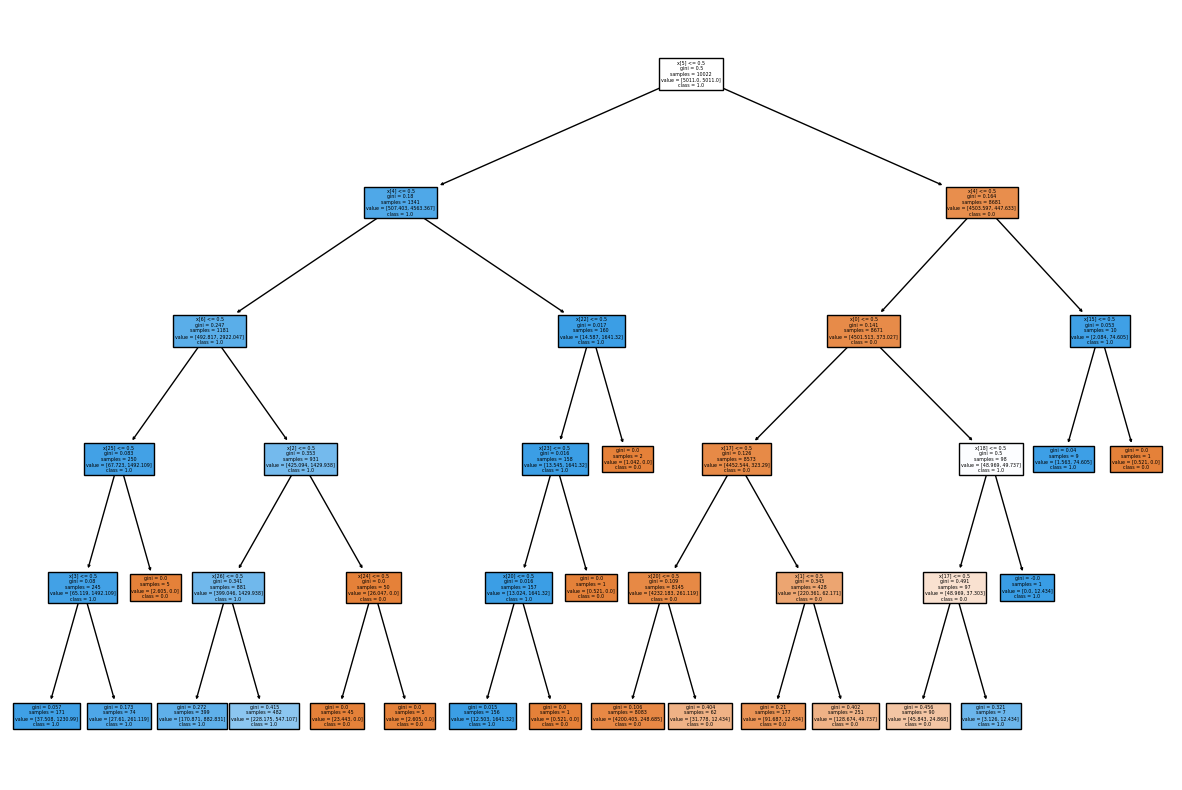

In [ ]:
#Convertion valeur de la variable tsunami en str
class_names = data_target["tsunami"].unique().astype(str)

# plot de l'arbre
plt.figure(figsize=(15,10))
plot_tree(model.best_estimator_, class_names = class_names, filled=True)
plt.show()